# [Movie Collection Predict Project]

- 1. Libraries and Data Loading
- 2. Missing Value Imputation
- 3. Dummy Variable Creation
- 4. Outlier Checking and Handling
- 5. Check Correlation Beetween Independent and Dependent Feature
- 6. Machine Learning Models
- 7. Model Evaluation

# Libraries and Data Loading

In [1]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pingouin import pairwise_ttests
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)

/Users/dimas/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/dimas/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/Users/dimas/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.2, the latest is 0.3.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
df = pd.read_csv("Movie_regression.csv")

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             494 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
dtypes: float64(12), int64(4), object(2)
memory usage: 71.2+ KB


# Missing Value Imputation

In [5]:
df['Time_taken'].fillna(df['Time_taken'].mean(), inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             506 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
dtypes: float64(12), int64(4), object(2)
memory usage: 71.2+ KB


# Dummy Variable Creation

In [7]:
dfDmy = pd.get_dummies(df,columns = ['3D_available', 'Genre'],drop_first = True)

In [8]:
dfDmy.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


# Outlier Checking and Handling

In [9]:
dfDmy.describe()['Collection']

count       506.000000
mean      45057.707510
std       18364.351764
min       10000.000000
25%       34050.000000
50%       42400.000000
75%       50000.000000
max      100000.000000
Name: Collection, dtype: float64

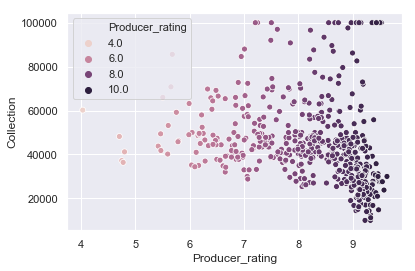

In [10]:
sns.set(font_scale=1)
sns.scatterplot(x="Producer_rating", y="Collection", hue='Producer_rating',
                     data=dfDmy)

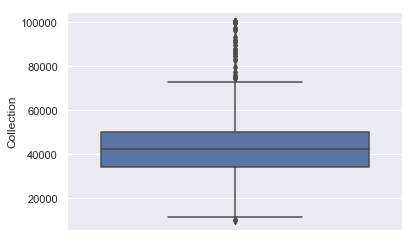

In [11]:
sns.boxplot(y=dfDmy['Collection'])

##### Outlier Handling

In [12]:
Q1 = dfDmy['Collection'].describe()['25%']
Q3 = dfDmy['Collection'].describe()['75%']
IQR = Q3 - Q1
dfPred = dfDmy[(dfDmy['Collection'] >= Q1 - (1.5*IQR)) & 
   (dfDmy['Collection'] <= Q3 + (1.5*IQR))]

dfPred.describe()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,91.655693,77.730878,0.443431,34337.037045,142.065525,7.992131,8.163415,7.996852,8.168929,7.776916,444137.910064,156.279011,260.915460,39.173448,546.197002,41499.357602,0.533191,0.310493,0.188437,0.359743
std,164.755106,13.593104,0.117405,3204.190456,28.101307,1.064144,1.063721,1.069589,1.061467,0.635461,66990.812729,30.866051,108.684132,12.469443,108.374726,12928.488506,0.499432,0.463191,0.391480,0.480440
min,20.126400,56.480000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,11200.000000,0.000000,0.000000,0.000000,0.000000
25%,21.657300,65.960000,0.376000,32643.957500,118.550000,7.275000,7.467500,7.265000,7.472500,7.180000,405104.000000,131.380000,223.512000,28.000000,465.000000,33000.000000,0.000000,0.000000,0.000000,0.000000
50%,24.904400,74.800000,0.462000,34241.020000,150.800000,8.295000,8.455000,8.295000,8.425000,7.960000,456975.000000,157.391498,245.344000,39.000000,536.000000,41200.000000,1.000000,0.000000,0.000000,0.000000
75%,94.719300,91.200000,0.549000,36165.827500,167.600000,8.860000,9.025000,8.865000,9.027500,8.200000,493085.500000,181.100000,283.384000,50.000000,616.500000,48200.000000,1.000000,1.000000,0.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.330000,9.505000,9.425000,9.635000,9.400000,567784.000000,213.360000,2022.400000,60.000000,868.000000,73000.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
print(f'Number of rows BEFORE outlier handling = {len(dfDmy)}')
print(f'Number of rows AFTER outlier handling = {len(dfPred)}')
print(f'The difference = {len(dfDmy) - len(dfPred)}')

Number of rows BEFORE outlier handling = 506
Number of rows AFTER outlier handling = 467
The difference = 39


Text(0.5, 1.0, 'Scatter Plot After outliers Handling')

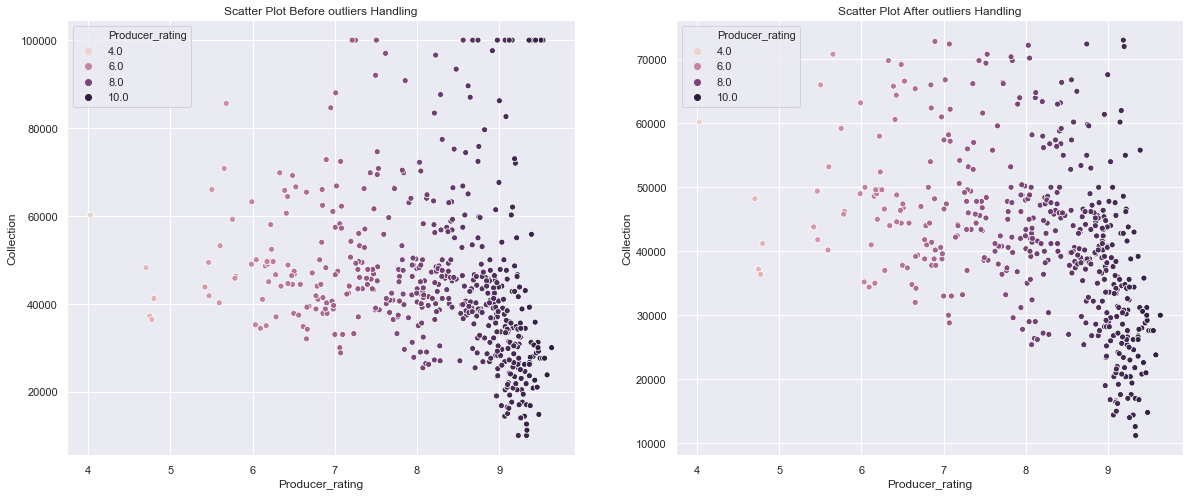

In [14]:
# sns.set(font_scale=1.3)
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.scatterplot(x="Producer_rating", y="Collection", hue='Producer_rating',
                     data=dfDmy)
plt.title('Scatter Plot Before outliers Handling')

plt.subplot(1,2,2)
sns.scatterplot(x="Producer_rating", y="Collection", hue='Producer_rating',
                     data=dfPred)
plt.title('Scatter Plot After outliers Handling')

Text(0.5, 1.0, 'Scatter Plot After outliers Handling')

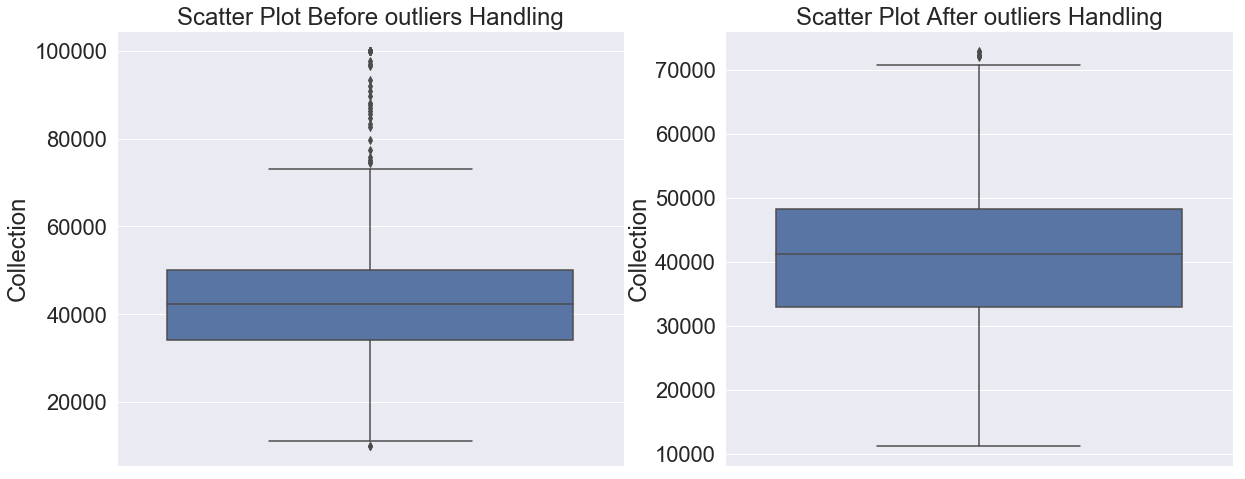

In [15]:
sns.set(font_scale=2)
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
sns.boxplot(y=dfDmy['Collection'])
plt.title('Scatter Plot Before outliers Handling')

plt.subplot(1,2,2)
sns.boxplot(y=dfPred['Collection'])
plt.title('Scatter Plot After outliers Handling')

# [Check Correlation Beetween Independent and Dependent Feature]

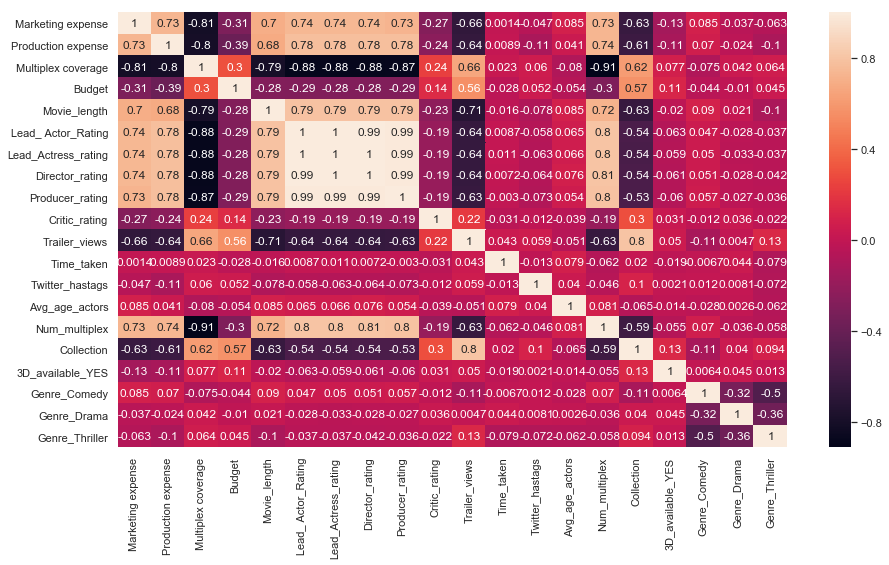

In [16]:
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
sns.heatmap(dfPred.corr('spearman'), annot =True)

# Machine Learning Model

In [43]:
dfPred.head()


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


#### Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

In [76]:
X = dfPred.loc[:,dfPred.columns!="Collection"]
y = dfPred['Collection']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

#### Machine Learning

In [180]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.ensemble import StackingRegressor

svr = SVR() 
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()
adb = AdaBoostRegressor()
gpr = GaussianProcessRegressor()




# estimators = [
# ...     ('lr', RidgeCV()),
# ...     ('svr', LinearSVR(random_state=42))
# ... ]

estimators = [('svrs',SVR()),('rfrs',RandomForestRegressor()),
              ('gbrs',GradientBoostingRegressor()),('xgbs',XGBRegressor()),
              ('adbs',AdaBoostRegressor()), ('gprs',GaussianProcessRegressor())]

stk = StackingRegressor(estimators=estimators,
                        final_estimator=RandomForestRegressor(n_estimators=10,
                                                              random_state=42))

In [146]:
params = {'C':(0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100,500,1000)}

In [147]:
svm_grid_lin = GridSearchCV(svr, params, n_jobs=-1, 
                            cv=5, verbose=1, scoring='neg_mean_squared_error')


In [181]:
svr.fit(X_train, y_train)
rfr.fit(X_train, y_train)
gbr.fit(X_train, y_train)
xgb.fit(X_train, y_train)
adb.fit(X_train, y_train)
gpr.fit(X_train, y_train)

stk.fit(X_train, y_train)

/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:55:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(cv=None,
                  estimators=[('svrs',
                               SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                   epsilon=0.1, gamma='scale', kernel='rbf',
                                   max_iter=-1, shrinking=True, tol=0.001,
                                   verbose=False)),
                              ('rfrs',
                               RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease...
                  final_estimator=Rando

In [208]:
# from sklearn import model_selection

# for reg, label in zip(estimators, ['svrs','rfrs','gbrs','xgbs',
#                                    'adbs','gprs']):
#     mse = model_selection.cross_val_score(reg,X,y,cv=3, scoring='neg_mean_squared_error')
    
# #     print(f'mse :')
# #     print(mse)


In [211]:
model_selection.cross_val_score(xgb,X,y,cv=3, scoring='neg_mean_squared_error')


[19:32:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:32:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


array([-2.84778709e+07, -5.91708337e+07, -1.39714306e+08])

#### Predict values using trained model

In [182]:
y_test_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)

y_test_pred_rfr = rfr.predict(X_test)
y_train_pred_rfr = rfr.predict(X_train)

y_test_pred_gbr = gbr.predict(X_test)
y_train_pred_gbr = gbr.predict(X_train)

y_test_pred_xgb = xgb.predict(X_test)
y_train_pred_xgb = xgb.predict(X_train)

y_test_pred_adb = adb.predict(X_test)
y_train_pred_adb = adb.predict(X_train)

y_test_pred_gpr = gpr.predict(X_test)
y_train_pred_gpr = gpr.predict(X_train)

y_test_pred_stk = stk.predict(X_test)
y_train_pred_stk = stk.predict(X_train)

#### Model Performance

In [150]:
from sklearn.model_selection import KFold

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score

In [183]:
print('Result Model Performance Grid Search CV : ')

print('')

print('Y Train')
print('')
print('SUPPORT VECTOR REGRESSOR')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('R2  Score:', r2_score(y_train, y_train_pred))
print('')
print('RANDOM FORREST REGRESSOR')
print('MAE:', mean_absolute_error(y_train, y_train_pred_rfr))
print('MSE:', mean_squared_error(y_train, y_train_pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred_rfr)))
print('R2  Score:', r2_score(y_train, y_train_pred_rfr))
print('')
print('GRADIENT BOOST REGRESSOR')
print('MAE:', mean_absolute_error(y_train, y_train_pred_gbr))
print('MSE:', mean_squared_error(y_train, y_train_pred_gbr))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred_gbr)))
print('R2  Score:', r2_score(y_train, y_train_pred_gbr))
print('')
print('XG BOOST REGRESSOR')
print('MAE:', mean_absolute_error(y_train, y_train_pred_xgb))
print('MSE:', mean_squared_error(y_train, y_train_pred_xgb))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)))
print('R2  Score:', r2_score(y_train, y_train_pred_xgb))
print('')
print('ADA BOOST REGRESSOR')
print('MAE:', mean_absolute_error(y_train, y_train_pred_adb))
print('MSE:', mean_squared_error(y_train, y_train_pred_adb))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred_adb)))
print('R2  Score:', r2_score(y_train, y_train_pred_adb))
print('')
print('GAUSSIAN REGRESSOR')
print('MAE:', mean_absolute_error(y_train, y_train_pred_gpr))
print('MSE:', mean_squared_error(y_train, y_train_pred_gpr))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred_gpr)))
print('R2  Score:', r2_score(y_train, y_train_pred_gpr))

print('')
print('STACKING REGRESSOR')
print('MAE:', mean_absolute_error(y_train, y_train_pred_stk))
print('MSE:', mean_squared_error(y_train, y_train_pred_stk))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred_stk)))
print('R2  Score:', r2_score(y_train, y_train_pred_stk))

print(' ')
print('')

print('Y Test')
print('')
print('SUPPORT VECTOR REGRESSOR')
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R2  Score:',r2_score(y_test, y_test_pred))
print('')
print('RANDOM FORREST REGRESSOR')
print('MAE:', mean_absolute_error(y_test, y_test_pred_rfr))
print('MSE:', mean_squared_error(y_test, y_test_pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred_rfr)))
print('R2  Score:',r2_score(y_test, y_test_pred_rfr))
print('')
print('GRADIENT BOOST REGRESSOR')
print('MAE:', mean_absolute_error(y_test, y_test_pred_gbr))
print('MSE:', mean_squared_error(y_test, y_test_pred_gbr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred_gbr)))
print('R2  Score:', r2_score(y_test, y_test_pred_gbr))
print('')
print('XG BOOST REGRESSOR')
print('MAE:', mean_absolute_error(y_test, y_test_pred_xgb))
print('MSE:', mean_squared_error(y_test, y_test_pred_xgb))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)))
print('R2  Score:', r2_score(y_test, y_test_pred_xgb))
print('')
print('ADA BOOST REGRESSOR')
print('MAE:', mean_absolute_error(y_test, y_test_pred_adb))
print('MSE:', mean_squared_error(y_test, y_test_pred_adb))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred_adb)))
print('R2  Score:', r2_score(y_test, y_test_pred_adb))
print('')
print('GAUSSIAN REGRESSOR')
print('MAE:', mean_absolute_error(y_test, y_test_pred_gpr))
print('MSE:', mean_squared_error(y_test, y_test_pred_gpr))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred_gpr)))
print('R2  Score:', r2_score(y_test, y_test_pred_gpr))
print('')
print('STACKING REGRESSOR')
print('MAE:', mean_absolute_error(y_test, y_test_pred_stk))
print('MSE:', mean_squared_error(y_test, y_test_pred_stk))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred_stk)))
print('R2  Score:', r2_score(y_test, y_test_pred_stk))





Result Model Performance Grid Search CV : 

Y Train

SUPPORT VECTOR REGRESSOR
MAE: 9992.084149994973
MSE: 163655323.63455442
RMSE: 12792.784045490427
R2  Score: 5.805391569335683e-05

RANDOM FORREST REGRESSOR
MAE: 1556.0857908847186
MSE: 4379774.991957105
RMSE: 2092.7911964544155
R2  Score: 0.9732393628779927

GRADIENT BOOST REGRESSOR
MAE: 1711.0305681301147
MSE: 4735178.488029563
RMSE: 2176.0465270829027
R2  Score: 0.9710678303203264

XG BOOST REGRESSOR
MAE: 1881.9380733704759
MSE: 5913318.808818155
RMSE: 2431.7316481919124
R2  Score: 0.9638693359544457

ADA BOOST REGRESSOR
MAE: 4036.354793150628
MSE: 22761915.46022208
RMSE: 4770.944923201491
R2  Score: 0.8609235951729515

GAUSSIAN REGRESSOR
MAE: 4.162198795884568e-06
MSE: 1.8960548195236795e-11
RMSE: 4.354371159563318e-06
R2  Score: 1.0

STACKING REGRESSOR
MAE: 2575.4959785522788
MSE: 10861982.841823056
RMSE: 3295.752242178264
R2  Score: 0.933632759265195
 

Y Test

SUPPORT VECTOR REGRESSOR
MAE: 10078.485684833897
MSE: 178703032.5026

# Model Evaluation

In [184]:
from sklearn.model_selection import KFold
from sklearn.metrics import  mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score

#### Feature Importance

In [185]:
coefs = pd.Series(gbr.feature_importances_,X_train.columns).sort_values()

Text(0.5, 1.0, 'Feature Importance')

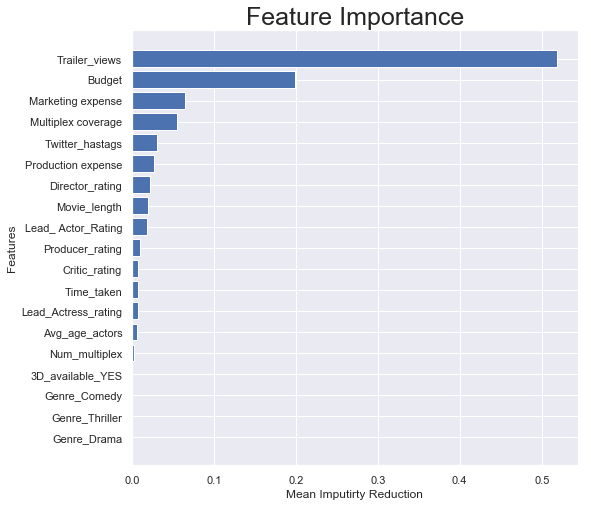

In [186]:
plt.figure(figsize=(8,8))
plt.barh(coefs.index,coefs.values)
plt.xlabel("Mean Imputirty Reduction")
plt.ylabel('Features')
plt.title('Feature Importance',fontsize=25)

#### Evaluation

In [187]:
K = 5
kF = KFold(n_splits = K, shuffle = True)
kfold_list = list(kF.split(X_train, y_train))

In [188]:
# Creating function to calculate train data error, validation data error and metric calculation
def calc_train_error(X_train, y_train, model):
    prediction = model.predict(X_train)
    mean_abs_error = mean_absolute_error(y_train,prediction)
    mean_sqr_error = mean_squared_error(y_train,prediction)
#     mean_sqr_log_error = mean_squared_log_error(y_train,prediction)
    median_abs_error = median_absolute_error(y_train,prediction)
    r2 = r2_score(y_train,prediction)
    rmse = np.sqrt(mean_sqr_error)

    return{
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error':mean_abs_error,
        'Mean Squared Error': mean_sqr_error,
#         'Mean Squared Log Error': mean_sqr_log_error,
        'Median Absolute Error': median_abs_error,
        'R2 score': r2
    }

def calc_validation_error(X_test, y_test, model):
    prediction = model.predict(X_test)
    mean_abs_error = mean_absolute_error(y_test,prediction)
    mean_sqr_error = mean_squared_error(y_test,prediction)
#     mean_sqr_log_error = mean_squared_log_error(y_test,prediction)
    median_abs_error = median_absolute_error(y_test,prediction)
    r2 = r2_score(y_test,prediction)
    rmse = np.sqrt(mean_sqr_error)

    return{
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error':mean_abs_error,
        'Mean Squared Error': mean_sqr_error,
#         'Mean Squared Log Error': mean_sqr_log_error,
        'Median Absolute Error': median_abs_error,
        'R2 score': r2
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error
    

In [190]:
svrEvaluation = SVR()
rfrEvaluation = RandomForestRegressor()
gbrEvaluation = GradientBoostingRegressor()
xgbEvaluation = XGBRegressor()
adbEvaluation = AdaBoostRegressor()
gprEvaluation = GaussianProcessRegressor()
stkEvaluation = stk

lstModel = [svrEvaluation,rfrEvaluation,gbrEvaluation,xgbEvaluation,adbEvaluation,
            gprEvaluation,stkEvaluation]
modelName = ['SVR','RFR','GBR','XGB','ADB','GPR','STK']

In [191]:
metrics = {}

for model,model_name_name in zip(lstModel,modelName):
    train_errors = []
    validation_errors = []
    for train_index, val_index, in kfold_list:

        # split X
        X_train_train, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_train, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # instantiate model
        model = model

        # calculate errors
        train_error, val_error = calc_metrics(X_train_train, y_train_train, X_val, y_val, model)

        # append to appropirate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    metrics[model_name_name] = {'train_errors':train_errors,'validation_errors':validation_errors}

/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:02:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:02:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:02:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [192]:
columns = pd.MultiIndex.from_product([['Root Mean Squared Error','Mean Absolute Error', 'Mean Squared Error','Median Absolute Error','R2 score'], modelName],
                                     names=['Metric', 'Model'])

metric_df = pd.DataFrame(data=0,columns=columns,index=['{} Iteration'.format(i) for i in range(1,K+1)]+['Average'])
for i in list(metric_df.columns.get_level_values(0).drop_duplicates()):
    for k in range(5):
        temp = []
        for j in modelName:

            temp.append(round(metrics[j]['validation_errors'][k][i],2))

        metric_df.loc['{} Iteration'.format(k+1),i] = temp
        
        
metric_avg = []
for i in list(metric_df.columns.get_level_values(0).drop_duplicates()):
    for j in modelName:
        metric_avg.append(round(metric_df[i][j].iloc[:5].mean(),2))
#         print(i,j,metric_df[i][j].mean())
metric_df.loc['Average'] = metric_avg

In [193]:
metric_df

Metric      Root Mean Squared Error                                      \
Model                           SVR      RFR      GBR      XGB      ADB   
1 Iteration                11767.49  4466.40  4429.35  4391.47  5243.31   
2 Iteration                11843.59  6589.93  6403.48  6167.27  6435.07   
3 Iteration                12907.60  4822.69  5026.70  5107.84  6076.58   
4 Iteration                13099.65  6318.00  6595.62  6481.63  6823.95   
5 Iteration                14257.77  6146.97  5636.04  6208.84  6649.17   
Average                    12775.22  5668.80  5618.24  5671.41  6245.62   

Metric                         Mean Absolute Error                             \
Model             GPR      STK                 SVR      RFR      GBR      XGB   
1 Iteration  43058.98  5312.82             9141.41  3435.60  3299.82  3260.92   
2 Iteration  43005.69  6484.91             9112.34  4729.17  4614.49  4562.66   
3 Iteration  43256.95  5576.94             9997.76  4099.89  4035.06  4011.41   
4 Iteration  45233.11  6625.46            10378.70  4846.14  5023.54  5114.91   
5 Iteration  43139.79  6840.05            11442.43  4668.76  4275.54  4772.32   
Average      43538.90  6168.04            10014.53  4355.91  4249.69  4344.44   

Metric                                  Mean Squared Error               \
Model            ADB       GPR      STK                SVR          RFR   
1 Iteration  4075.74  41418.67  3783.73       1.384738e+08  19948715.57   
2 Iteration  4889.83  41341.33  4597.33       1.402705e+08  43427237.87   
3 Iteration  4901.86  41285.33  4309.60       1.666061e+08  23258348.69   
4 Iteration  5205.11  43356.76  4952.16       1.716008e+08  39917078.22   
5 Iteration  5055.89  40718.92  5335.68       2.032840e+08  37785291.89   
Average      4825.69  41624.20  4595.70       1.640470e+08  32867334.45   

Metric                                                                         \
Model                GBR          XGB          ADB           GPR          STK   
1 Iteration  19619102.89  19284965.06  27492333.92  1.854076e+09  28226106.67   
2 Iteration  41004563.47  38035263.79  41410163.54  1.849490e+09  42054090.67   
3 Iteration  25267762.79  26090009.43  36924811.76  1.871164e+09  31102266.67   
4 Iteration  43502268.77  42011487.09  46566254.49  2.046035e+09  43896697.30   
5 Iteration  31764950.58  38549740.97  44211440.61  1.861041e+09  46786335.14   
Average      32231729.70  32794293.27  39321000.86  1.896361e+09  38413099.29   

Metric      Median Absolute Error                                              \
Model                         SVR     RFR      GBR      XGB      ADB      GPR   
1 Iteration               7196.47  2850.0  2443.68  2750.36  3300.00  40200.0   
2 Iteration               6779.84  3508.0  2983.16  3206.03  3880.85  41200.0   
3 Iteration               6595.22  3500.0  3401.92  3378.44  4304.26  42000.0   
4 Iteration               8107.80  3879.0  4045.85  3851.00  4587.70  42100.0   
5 Iteration               8900.73  4015.0  3196.50  4076.94  4243.47  40600.0   
Average                   7516.01  3550.4  3214.22  3452.55  4063.26  41220.0   

Metric              R2 score                                       
Model           STK      SVR   RFR   GBR   XGB   ADB    GPR   STK  
1 Iteration  2600.0     0.00  0.86  0.86  0.86  0.80 -12.38  0.80  
2 Iteration  3580.0     0.00  0.69  0.71  0.73  0.71 -12.17  0.70  
3 Iteration  3640.0     0.00  0.86  0.85  0.84  0.78 -10.23  0.81  
4 Iteration  3860.0    -0.03  0.76  0.74  0.75  0.72 -11.31  0.74  
5 Iteration  4730.0    -0.00  0.81  0.84  0.81  0.78  -8.17  0.77  
Average      3682.0    -0.01  0.80  0.80  0.80  0.76 -10.85  0.76

In [194]:
metricDfTranspose = metric_df.transpose()

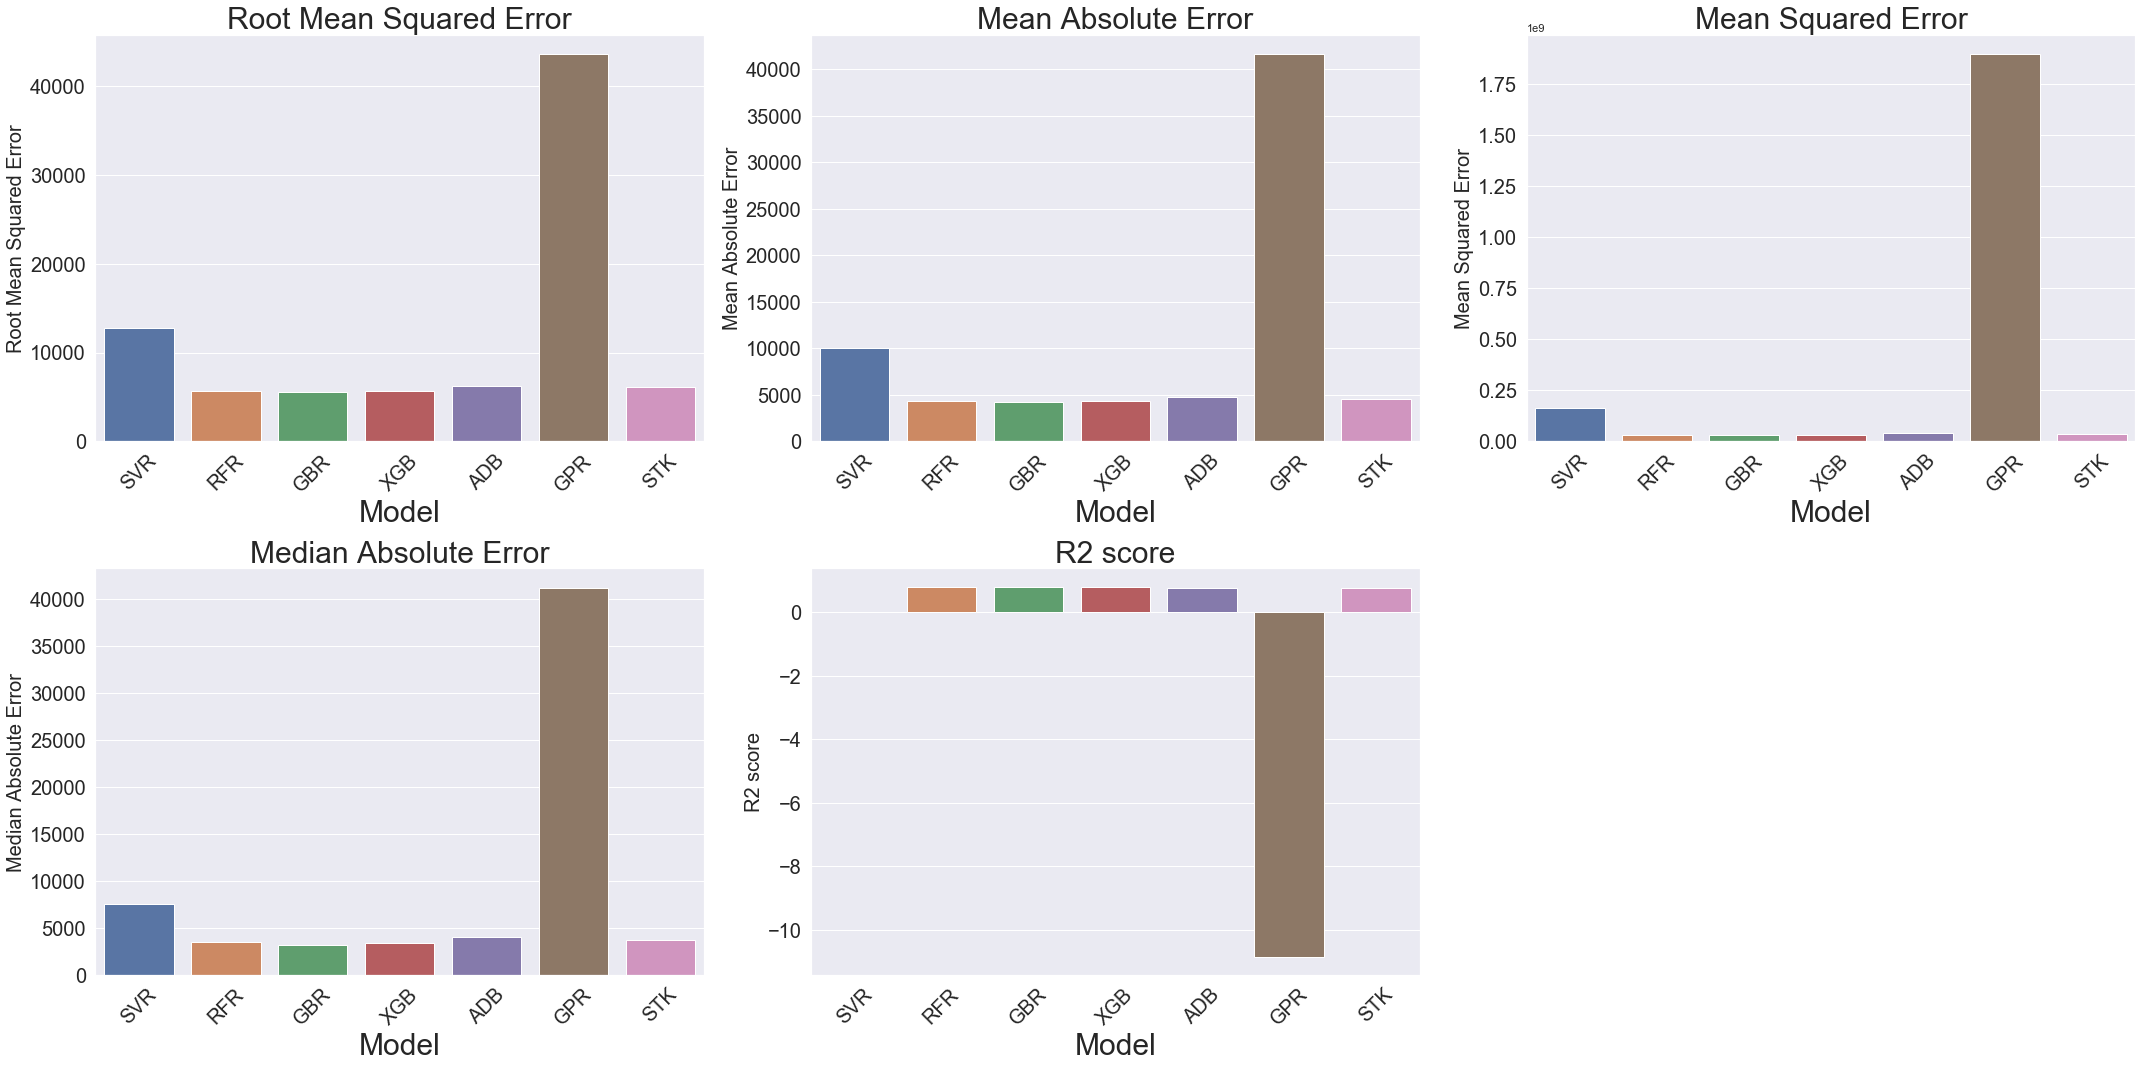

In [195]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(30,15))
gs = GridSpec(2,3)

eval_metric_parameters = list(columns.get_level_values(0).unique())
eval_model_names = list(columns.get_level_values(1).unique())
eval_metric_parameters_cnt = []

for i in range(2):
    position = 0
    for j in range(3):
        cnt = i*2+j
        if cnt not in eval_metric_parameters_cnt:
            eval_metric_parameters_cnt.append(cnt)
            current_metric_parameter = eval_metric_parameters[i*2+j]
            current_data = metricDfTranspose.loc[current_metric_parameter].reset_index()
            sns.barplot(data=current_data,x='Model',y='Average',ax=fig.add_subplot(gs[i,position]))
            plt.title(current_metric_parameter,size=30)
            plt.xticks(size=20,rotation=45)
            plt.yticks(size=20)
            plt.xlabel("Model",size=30)
            plt.ylabel(current_metric_parameter,size=20)
            position += 1

plt.tight_layout()
